In [238]:
# impoting the libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas_datareader.data as web
import datetime as dt
import sklearn
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import bs4 as bs
import urllib.request as urlb
import pickle
import requests
import os
#import mpld3
%matplotlib notebook

#mpld3.enable_notebook()
style.use('ggplot')

In [239]:
# asigning the start date and end date 
start = dt.datetime(1985, 1, 1) # collect from this date
end = dt.datetime.today() #to this date.
stock  = 'AAPL' #using Apple's stock data
df = web.DataReader(stock,'yahoo',start,end) #fetches the data from Yahoo and stores it in data.

In [240]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1985-01-02,0.520089,0.497768,0.520089,0.497768,43825600.0,0.022481
1985-01-03,0.520089,0.506696,0.506696,0.506696,41652800.0,0.022884
1985-01-04,0.508929,0.500000,0.506696,0.506696,34316800.0,0.022884
1985-01-07,0.508929,0.504464,0.506696,0.504464,42728000.0,0.022783
1985-01-08,0.508929,0.500000,0.504464,0.500000,35280000.0,0.022581


In [241]:
df = df.rename(columns = {'Adj Close':'adj_close'})

In [242]:
df.head()

,High,Low,Open,Close,Volume,adj_close
Date,,,,,,
1985-01-02,0.520089,0.497768,0.520089,0.497768,43825600.0,0.022481
1985-01-03,0.520089,0.506696,0.506696,0.506696,41652800.0,0.022884
1985-01-04,0.508929,0.500000,0.506696,0.506696,34316800.0,0.022884
1985-01-07,0.508929,0.504464,0.506696,0.504464,42728000.0,0.022783
1985-01-08,0.508929,0.500000,0.504464,0.500000,35280000.0,0.022581


In [243]:
df.to_csv('AAPL.csv')

In [244]:
data = pd.read_csv('AAPL.csv', parse_dates=True, index_col=0)

In [245]:
data.head()

,High,Low,Open,Close,Volume,adj_close
Date,,,,,,
1985-01-02,0.520089,0.497768,0.520089,0.497768,43825600.0,0.022481
1985-01-03,0.520089,0.506696,0.506696,0.506696,41652800.0,0.022884
1985-01-04,0.508929,0.500000,0.506696,0.506696,34316800.0,0.022884
1985-01-07,0.508929,0.504464,0.506696,0.504464,42728000.0,0.022783
1985-01-08,0.508929,0.500000,0.504464,0.500000,35280000.0,0.022581


<IPython.core.display.Javascript object>


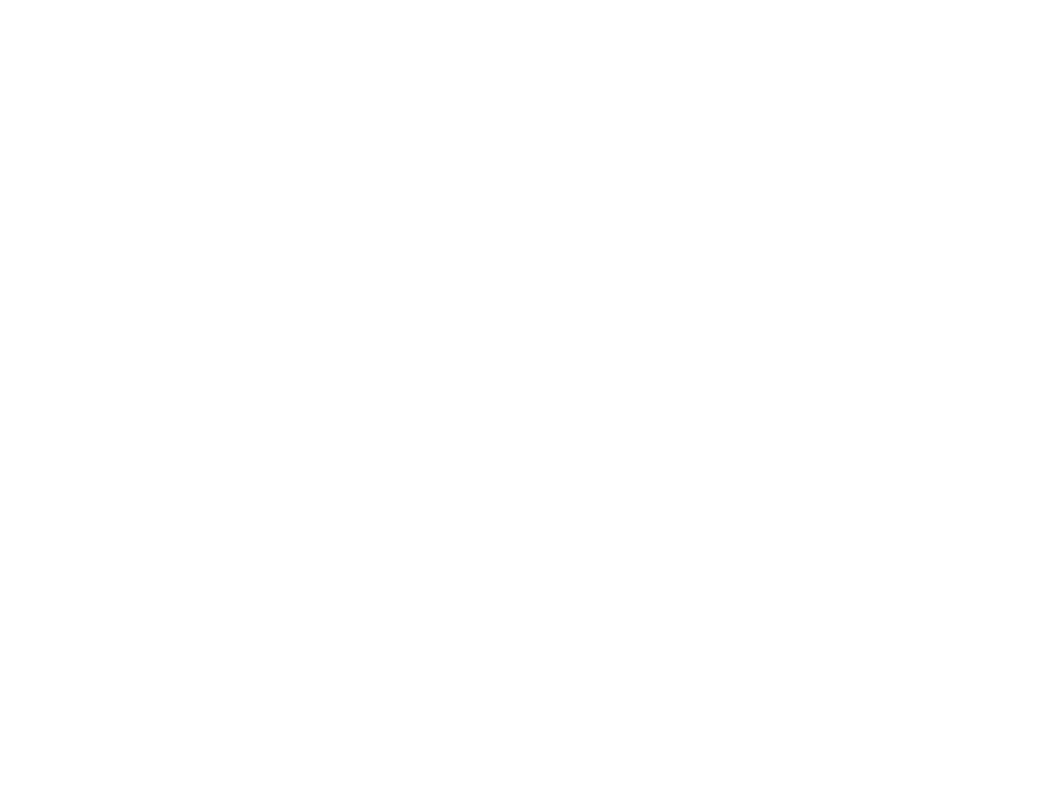

Text(0.5,1,'Stock Prices')

In [246]:
%matplotlib notebook
data[['adj_close','High','Low','Open','Close']].plot()
plt.title("Stock Prices")

# Rolling average method.

In [247]:
#creating a new column to add rolling average

#data['100ma'] = data['adj_close'].rolling(window=100).mean()

In [248]:
#data.tail()

In [249]:
#THe first 100 rows cant have the calculation.
#data.head()

In [250]:
#data.dropna(inplace=True)

In [251]:
#the first 100 rows will be deleted due to dropna
#data.head()

In [252]:
#data.tail()

In [253]:
# %matplotlib notebook

# #visualiziation
# ax1 = plt.subplot2grid((6,1), (0,0),rowspan=5,colspan=1)
# ax2 = plt.subplot2grid((6,1), (5,0),rowspan=1,colspan=1, sharex=ax1)

# ax1.plot(data.index,data['adj_close'])
# ax1.plot(data.index,data['100ma'])
# ax2.bar(data.index,data['Volume'])

# plt.show();

# Resampling the data.

In [254]:
data_ohlc=data['adj_close'].resample('10D').ohlc()#creates open high low close
data_volume= data['Volume'].resample('10D').sum()
data_ohlc.head()

,open,high,low,close
Date,,,,
1985-01-02,0.022481,0.024194,0.022481,0.023993
1985-01-12,0.024699,0.024699,0.022682,0.023590
1985-01-22,0.024295,0.024396,0.023388,0.023388
1985-02-01,0.023086,0.024194,0.023086,0.024094
1985-02-11,0.024598,0.024598,0.021271,0.021271


In [255]:
data_ohlc.reset_index(inplace=True)

In [256]:
#candlestick_ohlc requires mdates and ohlc.
data_ohlc['Date'] = data_ohlc['Date'].map(mdates.date2num)


In [257]:
data_ohlc.head()

,Date,open,high,low,close
0,724643.0,0.022481,0.024194,0.022481,0.023993
1,724653.0,0.024699,0.024699,0.022682,0.023590
2,724663.0,0.024295,0.024396,0.023388,0.023388
3,724673.0,0.023086,0.024194,0.023086,0.024094
4,724683.0,0.024598,0.024598,0.021271,0.021271


In [258]:
%matplotlib notebook

#visualiziation
ax1 = plt.subplot2grid((6,1), (0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0),rowspan=1,colspan=1, sharex=ax1)

ax1.xaxis_date()#this is to display actual dates in graph

candlestick_ohlc(ax1,data_ohlc.values,width=5,colorup='g')
ax2.fill_between(data_volume.index.map(mdates.date2num),data_volume.values,0)

plt.show();

<IPython.core.display.Javascript object>

## Using beautiful Soup to fetch S&P 500 companies from wikipedia.
- import beautifulsoup4 library
- use pickle to serialize any python object, this is used to save the S&P 500 list so as to avoid going back to wikipedia everytime it is needed.
- fetch the data

In [259]:
def sp500():
    res = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(res.text,'lxml')
    table = soup.find('table',{'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text #we need the first column which contains the tickers
        tickers.append(ticker)
    with open('sp500tickers.pickle',"wb")as f:
        pickle.dump(tickers,f)#dumping tickers to file 'f'
        print(tickers)
    return tickers
sp500()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CSX

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS'

    Gettitng the data of all the companies we just fetched from wikipedia
    - pull stock pricing data on all of the comapnies acquired
    - if we chose to reload the data, the program will pull the stock information from wikipedia again. But we will be storing the data as a pickle object, and will be storing the data on our local system as the data will be fetched frequently, this makes it more efficient.
    - Using the datetime function for pandas to specify dates for pandas.
    - os is used to creaete, edit and delete files on the system.'
    - Since I am unable to use the yahoo finance or google api to fetch historical data, I am using robinhood, it return the data from last year till today.

In summary we are parsing the data once from the website and storing it locally.

In [264]:
#to reload or not reload that is the quetion.

def get_data(reload = False):
    if reload:
        tickers = sp500()
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)
        if not os.path.exists('stock_dfs'):
            os.mkdir('stock_dfs')
        start = dt.datetime(2000,1,1)
        end = dt.datetime.now()
        for ticker in tickers:
            print(ticker)
            if not os.path.exists('stock_dfs\{}.csv'.format(ticker)):
                df = web.DataReader(ticker,'yahoo',start,end)
                df.reset_index(inplace=True)
                #df.rename(columns={'begins_at': 'Date','close_price':'Close','high_price':'High','low_price':'Low','open_price':'Open','volume':'Volume'}, inplace=True)
                
                #df = df.drop("symbol",axis=1)
                #df = df.drop("interpolated",axis=1)
                #df = df.drop("session",axis=1)
                #df = df[['Date','Open','High','Low','Close','Volume']]
                #df.set_index("Date",inplace=True)
                df.to_csv('stock_dfs{}.csv'.format(ticker))
            else:
                print("Alerady have {}".format(ticker))
get_data()          

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AET
AMG
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
AGN
ADS
LNT
ALL
GOOGL
GOOG
MO
AMZN
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
APC
ADI
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ARNC
ANET
AJG
AIZ
T
ADSK
ADP
AZO
AVB
AVY
BHGE
BLL
BAC
BK
BAX
BBT
BDX
BRK.B


KeyError: 'Date'

In [270]:

start = dt.datetime(2018,5,15)
end = dt.datetime(2018,8,15)

df = web.DataReader('BRK.B', 'yahoo', start, end)
df.head()

KeyError: 'Date'